# Exercise 1: FEM in 1D

#### Exercise 1.1 - Derive the weighted average of the residual (the equations we solve numerically in the FEM method) by integrating by parts and expanding the solution using nodal basis functions.

##### Answer:

\begin{align}
    \tag{1}
- \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f = s, \; a < x < b,
\end{align}

\begin{align}
\tag*{}
f(a) = f_a
\end{align}

\begin{equation}
\tag*{}
f(b) = f_b.
\end{equation}

We will use the finite element method to solve this problem. We will use linear elements, so the solution will be piecewise linear. We will use the Galerkin method to derive the weak form of the problem. We will use the following nodal basis functions:

\begin{equation}
\tag{2}
f(x) = \sum_{i=1}^{N+1} f_i \varphi_i(x).
\end{equation}

We know that to obtain the weighted average of the residuals we want to minimize the residual $r = L[f] - s$. To do this, we set a weighted average of the residual to zero

\begin{equation}
\tag{3}
\langle w_i, r \rangle = 0,
\end{equation}
where $r$ is
\begin{equation}
\tag{4}
r = - \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f - s = L[f] -s,
\end{equation}

With this, we can develop Eq. (3) as follows:

\begin{equation}
\begin{split}
\tag{5}
\langle w_i, r \rangle &= \int_a^b w_i \left( - \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f - s \right) dx = \\
&= \int_a^b \left(-w_i\frac{d}{dx}\alpha f' + w_i\beta f - w_is \right)dx = \\
&= [-w_i\alpha f']|^b_a + \int_a^b \left(w_i'\alpha f' + w_i\beta f - w_is \right)dx = \\
&= \int_a^b \left(w_i'\alpha f' + w_i\beta f - w_is \right)dx = 0, \quad i = 2, \ldots, N.
\end{split}
\end{equation}

The term $[-w_i\alpha f']|^b_a$ is zero because $w_i(a) = w_i(b) = 0$.

Now we can use the basis functions to write the equation (5) as

\begin{equation}
\tag{6}
\int_a^b \left(w_i'\alpha \sum_{j=1}^{N+1} f_j \varphi_j' + w_i\beta \sum_{j=1}^{N+1} f_j \varphi_j - w_i s \right)dx = 0, \quad i = 2, \ldots, N.
\end{equation}

Using Galerkin's method, this is, $w_i = \varphi_i$, and knowing that $f_1 = f(a)$ and $f_{N+1} = f(b)$, we can write the equation (6) as

\begin{equation}
\tag{7}
\int_a^b \left(\varphi_i'\alpha \sum_{j=1}^{N+1} f_j \varphi_j' + \varphi_i\beta \sum_{j=1}^{N+1} f_j \varphi_j - \varphi_i s \right)dx = 0, \quad i = 2, \ldots, N, \quad j = 2, \ldots, N.
\end{equation}
setting $j = 1$ and $j = N+1$ outside the sum so we can set this as a linear system with a square matrix.

Separating the terms in the equation (7), in a linear system $Az = b$, we have

\begin{equation}
\tag{8}
\begin{split} 
&A_{ij} = \int_a^b \left(\alpha\varphi_i'\varphi_j' + \beta\varphi_i\varphi_j \right)dx, \\
&z_j = f_j, \\
&b_i = \int_a^b \varphi_i s dx - (A_{i1}f_1 + A_{i,N+1}f_{N+1}).
\end{split}
\end{equation}
(We choose to write the system in this format because this gives us already a square matrix $A$.)

Writing the linear system like this is useful because we obtain a square matrix $A$ that is symmetric.

#### Exercise 1.2 -  Implement a code in Python to solve numerically the Helmholtz equation above with
-   alpha = 1 
-   beta = 1
-   a = 0
-   b = pi
-   s(x) = 10*sin(3*x)


In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:

##################### Configuration #####################
n = 30
h = np.pi / n

# Global stiffness matrix A and right-hand side vector b.
A = np.zeros((n-1, n-1)) 
b = np.zeros(n-1)

# alpha function
def alpha(x):
    return 1

# beta function
def beta(x):
    return 1

# source
def s(x):
    sin3x = np.sin(3 * x)
    sval = 9 * sin3x
    sval += sin3x
    return sval

##################### Setting the matrix A and vector b #####################
for i in range(1, n + 1):
    # Coordinates
    xim1 = (i - 1) * h
    xi = i * h

    # Points for 2-point Gauss quadrature
    pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
    pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

    # Form Stiffness matrix A
    pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h
    qiint = 0.5 * (beta(pt1) * (pt1 - xim1) ** 2 + beta(pt2) * (pt2 - xim1) ** 2) * h
    qim1int = 0.5 * (beta(pt1) * (xi - pt1) ** 2 + beta(pt2) * (xi - pt2) ** 2) * h

    if i < n:
        A[i - 1, i - 1] += pint / h**2 + qiint / h**2

    if i > 1:
        A[i - 2, i - 2] += pint / h**2 + qim1int / h**2
        qiim1 = 0.5 * h * (beta(pt1) * (xi - pt1) * (pt1 - xim1) + beta(pt2) * (xi - pt2) * (pt2 - xim1))
        if i < n:
            A[i - 2, i - 1] = -pint / h**2 + qiim1 / h**2
            A[i - 1, i - 2] = A[i - 2, i - 1]

    # Right-hand side
    fiint = 0.5 * (s(pt1) * (pt1 - xim1) + s(pt2) * (pt2 - xim1)) * h
    fim1int = 0.5 * (s(pt1) * (xi - pt1) + s(pt2) * (xi - pt2)) * h
    if i < n:
        b[i - 1] += fiint / h
    if i > 1:
        b[i - 2] += fim1int / h

In [115]:
# Solve the linear system using the FEM method
f = np.linalg.solve(A, b)

In [116]:
# Analytical Solution
ftrue = np.zeros(n-1)  # Initialize the array for the analytical solution

for i in range(1, n):
    xi = i * h
    ftrue[i-1] = np.sin(3*xi)  # Analytical solution

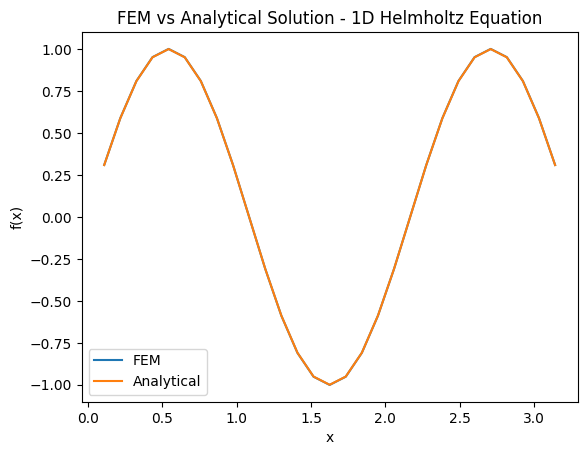

In [117]:
plt.plot(np.linspace(0, np.pi, n)[1:], f, label='FEM') # We skip the first node since we are only computing the solution at the interior nodes
plt.plot(np.linspace(0, np.pi, n)[1:], ftrue, label='Analytical')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('FEM vs Analytical Solution - 1D Helmholtz Equation')
plt.legend()
plt.show()


#### 1.2.3 Report and describe code to calculate the element of stiffness matrix, Aij, and source term elements bi. Where the derivative of the test/weight function is taken? How do you solve the linear system?

##### Answer:
To obtain the element of the stiffness matrix $A_{ij}$ and the source term elements $b_i$, we need to calculate the integrals in the equation (8). For that the 2-point Gauss quadrature is used. This is done in the for loop, where the objects needed to compute the linear system are set. The derivative of the test/weight function is implicitly taken in the object $\texttt{pint}$, but since we are using linear elements, the derivative is constant in each element. Finally, the linear system is solved using the $\texttt{solve}$ function from the $\texttt{numpy.linalg}$ library, that solves the linear system $Az = b$, returning the vector $z$ with the solution - in our case, $f(x)$.

#### 1.2.4 What is the sparsity of the stiffness matrix? Plot the sparsity. Is what you expected?

The sparsity of the stiffness matrix is caused by the fact that the basis functions that we are using, linear functions that are only different from zero on the coodinate of the node i, make the coupling being only between nearest neighbors, since we are in 1D. Therefore, we obtain a tridiagonal matix. This is what we expected, and the sparsity of the stiffness matrix is shown in the plot below.

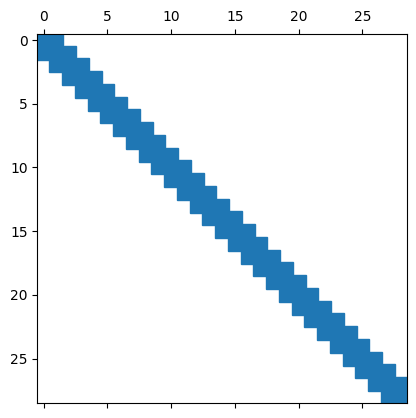

In [118]:
import scipy.sparse as sp

A_sps = sp.csr_matrix(A)
plt.spy(A_sps)
plt.show()

#### 1.2.5 Change the code to solve the Poisson equation d^2 Phi / dx^2 = - rho in 1D domain [0, pi]. the source term is rho = sin(2x) and Phi(0) = Phi(pi) = 0. Plot the solution of the potential using a different number of elements. It is not necessary to calculate the analytical solution for comparison.

In [119]:
##################### Configuration #####################
n = 30
h = np.pi / n

# Global stiffness matrix A and right-hand side vector b.
A = np.zeros((n-1, n-1)) 
b = np.zeros(n-1)

# alpha function
def alpha(x):
    return 1

# beta function
def beta(x):
    return 0

# source
def rho(x):
    return -np.sin(2*x)

##################### Setting the matrix A and vector b #####################
for i in range(1, n + 1):
    # Coordinates
    xim1 = (i - 1) * h
    xi = i * h

    # Points for 2-point Gauss quadrature
    pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
    pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

    # Form Stiffness matrix A
    pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h

    if i < n:
        A[i - 1, i - 1] += pint / h**2 

    if i > 1:
        A[i - 2, i - 2] += pint / h**2 
        if i < n:
            A[i - 2, i - 1] = -pint / h**2
            A[i - 1, i - 2] = A[i - 2, i - 1]

    # Right-hand side
    fiint = -0.5 * (rho(pt1) * (pt1 - xim1) + rho(pt2) * (pt2 - xim1)) * h
    fim1int = -0.5 * (rho(pt1) * (xi - pt1) + rho(pt2) * (xi - pt2)) * h
    if i < n:
        b[i - 1] += fiint / h
    if i > 1:
        b[i - 2] += fim1int / h

In [120]:
phi_interior = np.linalg.solve(A, b)
phi_full = np.zeros(n+1)
phi_full[1:-1] = phi_interior

In [121]:
phi_true = np.zeros(n+1)  # Initialize the array for the analytical solution

for i in range(0, n+1):
    xi = i * h
    phi_true[i] = (1/4)*np.sin(2*xi)

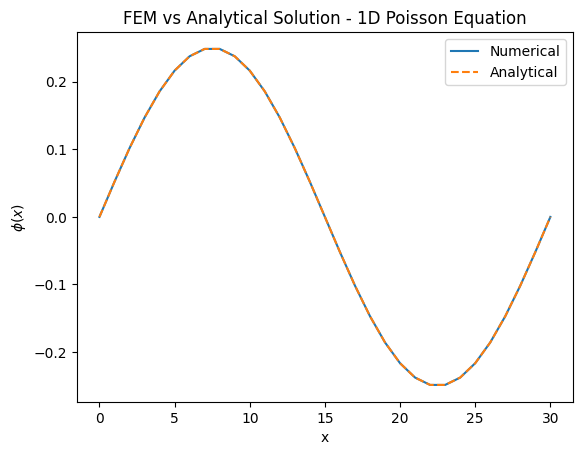

In [122]:
plt.plot(phi_full, label='Numerical')
plt.plot(phi_true, "--", label='Analytical')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM vs Analytical Solution - 1D Poisson Equation')
plt.legend()
plt.show()


In [123]:
def FEM_solution(n):
    ##################### Configuration #####################
    h = np.pi / n

    # Global stiffness matrix A and right-hand side vector b.
    A = np.zeros((n-1, n-1)) 
    b = np.zeros(n-1)

    # alpha function
    def alpha(x):
        return 1

    # beta function
    def beta(x):
        return 0

    # source
    def rho(x):
        return -np.sin(2*x)

    ##################### Setting the matrix A and vector b #####################
    for i in range(1, n + 1):
        # Coordinates
        xim1 = (i - 1) * h
        xi = i * h

        # Points for 2-point Gauss quadrature
        pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
        pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

        # Form Stiffness matrix A
        pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h

        if i < n:
            A[i - 1, i - 1] += pint / h**2 

        if i > 1:
            A[i - 2, i - 2] += pint / h**2 
            if i < n:
                A[i - 2, i - 1] = -pint / h**2
                A[i - 1, i - 2] = A[i - 2, i - 1]

        # Right-hand side
        fiint = -0.5 * (rho(pt1) * (pt1 - xim1) + rho(pt2) * (pt2 - xim1)) * h
        fim1int = -0.5 * (rho(pt1) * (xi - pt1) + rho(pt2) * (xi - pt2)) * h
        if i < n:
            b[i - 1] += fiint / h
        if i > 1:
            b[i - 2] += fim1int / h
    
    return A, b

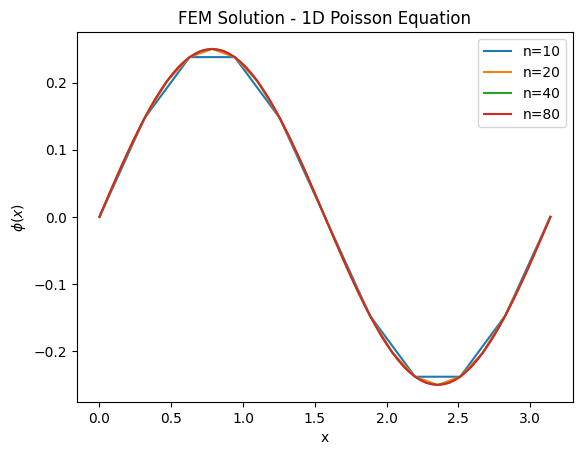

In [124]:
A_10, b_10 = FEM_solution(10)
phi_10 = np.linalg.solve(A_10, b_10)
phi_full_10 = np.zeros(11)
phi_full_10[1:-1] = phi_10

A_20, b_20 = FEM_solution(20)
phi_20 = np.linalg.solve(A_20, b_20)
phi_full_20 = np.zeros(21)
phi_full_20[1:-1] = phi_20

A_40, b_40 = FEM_solution(40)
phi_40 = np.linalg.solve(A_40, b_40)
phi_full_40 = np.zeros(41)
phi_full_40[1:-1] = phi_40

A_80, b_80 = FEM_solution(80)
phi_80 = np.linalg.solve(A_80, b_80)
phi_full_80 = np.zeros(81)
phi_full_80[1:-1] = phi_80

plt.plot(np.linspace(0, np.pi, 11), phi_full_10, label='n=10')
plt.plot(np.linspace(0, np.pi, 21), phi_full_20, label='n=20')
plt.plot(np.linspace(0, np.pi, 41), phi_full_40, label='n=40')
plt.plot(np.linspace(0, np.pi, 81), phi_full_80, label='n=80')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()
plt.show()


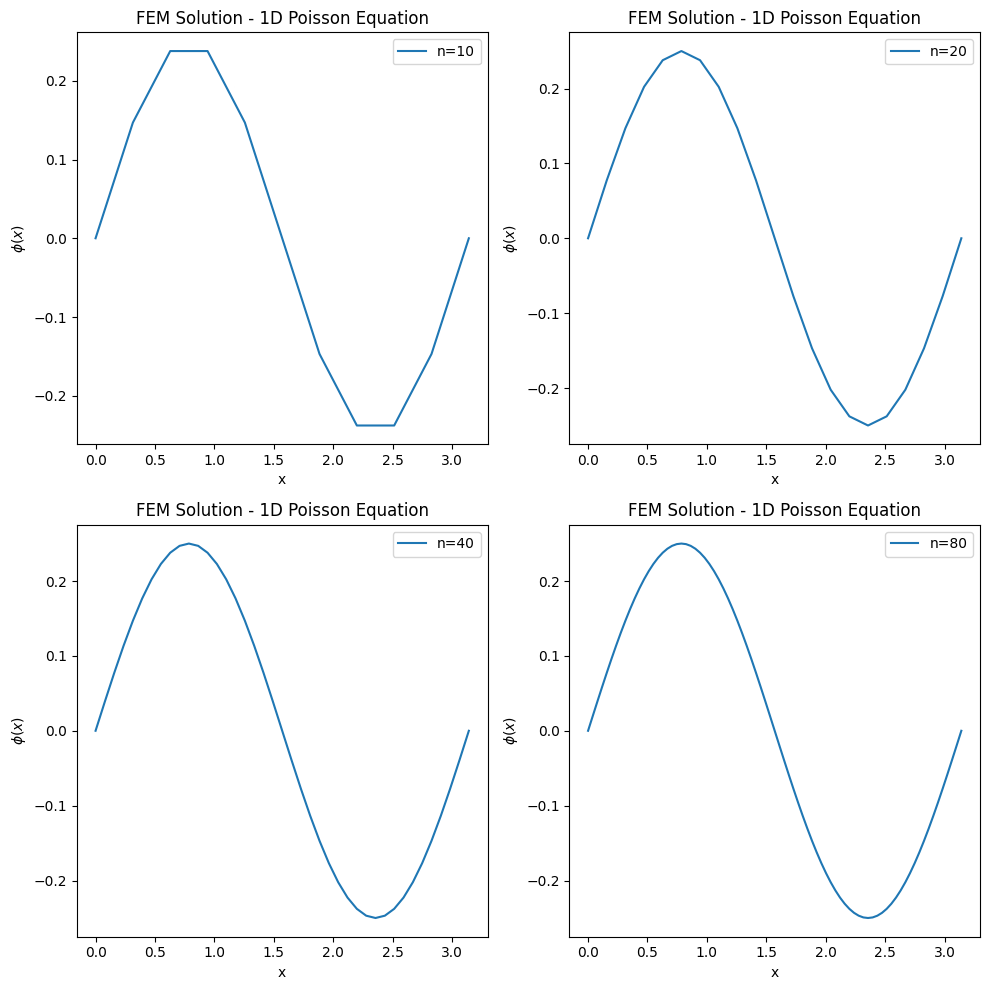

In [126]:
# Plotted separately for better visualization
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, np.pi, 11), phi_full_10, label='n=10')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, np.pi, 21), phi_full_20, label='n=20')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, np.pi, 41), phi_full_40, label='n=40')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(np.linspace(0, np.pi, 81), phi_full_80, label='n=80')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.tight_layout()
plt.show()

To solve the Poisson equation we can use the same code but we have to change the source and take into account that for this case $\alpha = 1$ and $\beta = 0$.
From the plots above we can see that the solution obtained using the FEM method is very close to the analytical solution.
After that we plotted the solution for different number of elements, and we can see that the solution converges to the analytical solution as we increase the number of elements.